# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn import metrics
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Understanding the data

In [2]:
data = pd.read_csv('Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Manipulation

In [9]:
for item in data.columns:
    print(item)
    print (data[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [10]:
data.drop(['customerID'], axis=1, inplace=True)

#### Convert all yes and no to 0's & 1's so our classifier can use this data.

In [13]:
data["gender"].replace(['Female','Male'],[0,1],inplace=True)
data["Partner"].replace(['No', 'Yes'], [0, 1], inplace=True)
data["Dependents"].replace(['No', 'Yes'], [0, 1], inplace=True)
data["PhoneService"].replace(['No', 'Yes'], [0, 1], inplace=True)
data["PaperlessBilling"].replace(['No', 'Yes'], [0, 1], inplace=True)
data["Churn"].replace(['No', 'Yes'], [0, 1], inplace=True)
data["StreamingMovies"].replace(['No', 'Yes'], [0, 1], inplace=True)

data["InternetService"].replace(['No','DSL', 'Fiber optic'],[0,1,2],inplace=True)
data["Contract"].replace(['Month-to-month','One year', 'Two year'],[0,1,2],inplace=True)

data = pd.get_dummies(data=data, columns=['PaymentMethod'])

data["MultipleLines"].replace(['No','Yes'],[0,1],inplace=True)
data["OnlineSecurity"].replace(['No','Yes'],[0,1],inplace=True)
data["OnlineBackup"].replace(['No','Yes'],[0,1],inplace=True)
data["DeviceProtection"].replace(['No','Yes'],[0,1],inplace=True)
data["TechSupport"].replace(['No', 'Yes'], [0, 1], inplace=True)
data["StreamingTV"].replace(['No', 'Yes'], [0, 1], inplace=True)

In [24]:
columns_to_convert = ['MultipleLines', 
                      'OnlineSecurity', 
                      'OnlineBackup', 
                      'DeviceProtection', 
                      'TechSupport',
                      'StreamingTV',
                     'StreamingMovies']

for item in columns_to_convert:
    data[item].replace(to_replace='No internet service',  value=0, inplace=True)
    data[item].replace(to_replace='No phone service',  value=0, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [15]:
#We can see TotalCharges is still an object. Fix TotalCharges as a float...
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

data = data.fillna(value=0)

In [25]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
InternetService                              int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
Contract                                     int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (au

In [26]:
data.groupby('Churn').size()/len(data) # What is the percentage of churners

Churn
0    0.73463
1    0.26537
dtype: float64

### Data Visualization

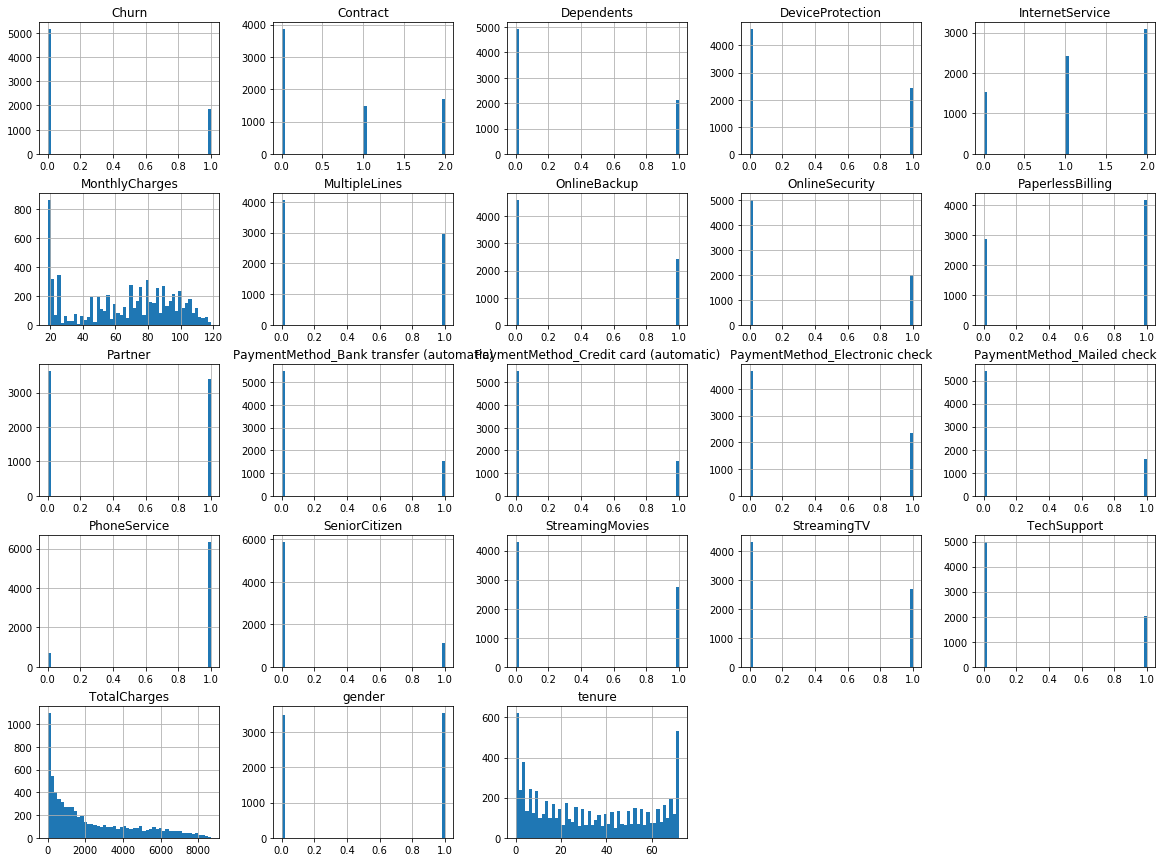

In [27]:
data.hist(bins=50, figsize=(20,15));

In [28]:
corr = data.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.010380,-0.017021,-0.013773,...,-0.010487,0.000126,-0.011754,-0.014569,-0.000080,-0.008612,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,...,0.120176,-0.142554,0.156530,0.220173,0.103006,0.150889,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,...,0.117412,0.294806,-0.014877,0.096848,0.317504,-0.150448,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,...,-0.039741,0.243187,-0.111377,-0.113890,0.062078,-0.164221,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,...,0.286111,0.671607,0.006152,0.247900,0.826178,-0.352229,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,...,-0.032959,0.002247,0.016505,0.247398,0.113214,0.011942,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,...,0.258751,0.107114,0.163530,0.490434,0.468504,0.040102,0.075527,0.060048,0.083618,-0.227206
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,...,0.427264,-0.290189,0.378108,0.905491,0.428963,0.316846,-0.013300,-0.032458,0.365104,-0.365534
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,...,0.187398,0.245530,-0.003636,0.296594,0.411651,-0.171226,0.095158,0.115721,-0.112338,-0.080798
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,...,0.274501,0.155085,0.126735,0.441780,0.509226,-0.082255,0.087004,0.090785,-0.000408,-0.174164


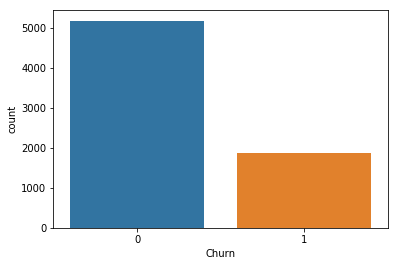

In [29]:
sns.countplot(data['Churn'],label = 'count')

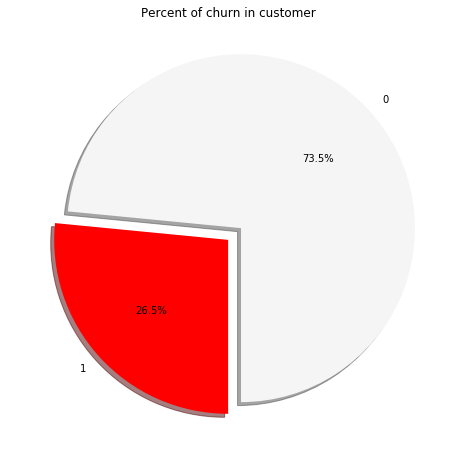

In [30]:
# Data to plot
labels =data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

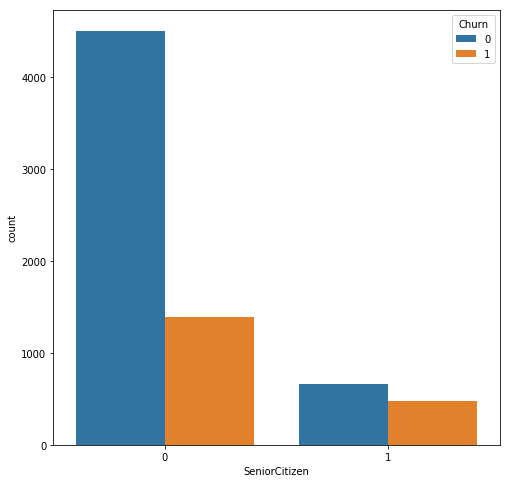

In [31]:
sns.countplot(x='SeniorCitizen',data=data,hue='Churn')

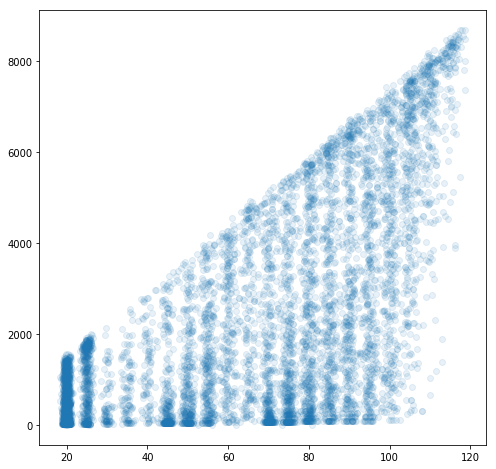

In [38]:
plt.scatter(x='MonthlyCharges',y='TotalCharges',alpha=0.1, data=data)

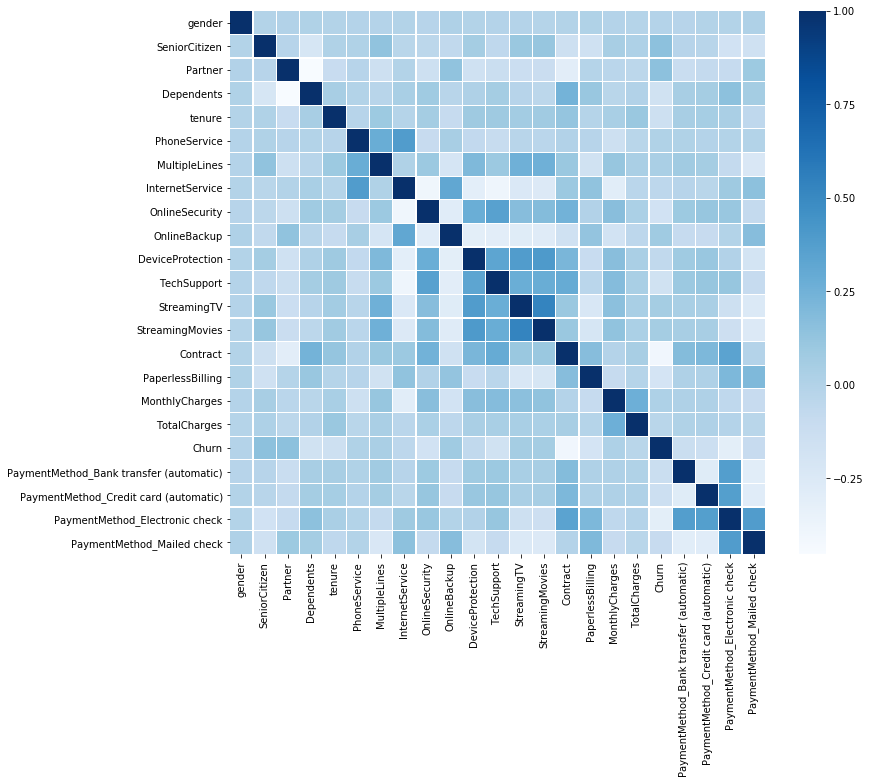

In [42]:
#We plot the correlation matrix, the darker a box is, the more features are correlated
plt.figure(figsize=(12,10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap='Blues')

#### Churn rate is a health indicator for subscription-based companies. The ability to identify customers that aren’t happy with provided solutions allows businesses to learn about product or pricing plan weak points, operation issues, as well as customer preferences and expectations to proactively reduce reasons for churn.

It’s important to define data sources and observation period to have a full picture of the history of customer interaction. Selection of the most significant features for a model would influence its predictive performance: The more qualitative the dataset, the more precise forecasts are.

Companies with a large customer base and numerous offerings would benefit from customer segmentation. The number and choice of ML models may also depend on segmentation results. Data scientists also need to monitor deployed models, and revise and adapt features to maintain the desired level of prediction accuracy.

### Implement Machine Learning Models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

In [47]:
data["Churn"] = data["Churn"].astype(int)
Y = data["Churn"].values
X = data.drop(labels = ["Churn"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

### Model Evaluation

#### LogisticRegression

In [48]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.801277501774308


#### RandomForestClassifier

In [58]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8019872249822569


#### SupportVectorClassifier

In [51]:
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7955997161107168

#### XGBClassifier

In [56]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7955997161107168

#### AdaBoostClassifier

In [60]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7984386089425124

#### Confusion matrix

In [61]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[934  92]
 [192 191]]


Normalized confusion matrix
[[0.91 0.09]
 [0.5  0.5 ]]


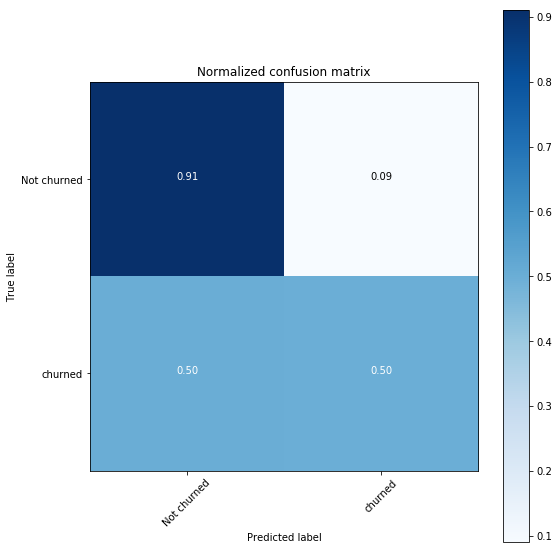

              precision    recall  f1-score   support

 Not churned       0.83      0.91      0.87      1026
     churned       0.67      0.50      0.57       383

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [65]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)
class_names = ['Not churned','churned']
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, preds, target_names=class_names)
print(eval_metrics)

### Final Conclusions

##### Finally, this task allowed us to identify the parameters that influence the departure of a client. It also permitted to develop a predictive model that will help the company to target more easily and quickly people that are likely to leave.

As LR score of 0.80 which is quite correct, optimizing the parameters didn't led to a better score. We can try to use more complex models such as Random Forest, Gradient Boosting etc.

Churn rate is a health indicator for subscription-based companies. The ability to identify customers that aren’t happy with provided solutions allows businesses to learn about product or pricing plan weak points, operation issues, as well as customer preferences and expectations to proactively reduce reasons for churn.

It’s important to define data sources and observation period to have a full picture of the history of customer interaction. Selection of the most significant features for a model would influence its predictive performance: The more qualitative the dataset, the more precise forecasts are.

Companies with a large customer base and numerous offerings would benefit from customer segmentation. The number and choice of ML models may also depend on segmentation results. Data scientists also need to monitor deployed models, and revise and adapt features to maintain the desired level of prediction accuracy.

#### Q1 - Data cleaning including missing values, outliers and multi-collinearity. Describe your predictive churn model. How did you select variables to be included in the model?


A)
- Descriptive analysis on the Data – 50% time
- Data treatment (Missing value and outlier fixing) – 40% time
- Data Modelling – 4% time
- Estimation of performance – 6% time


In multiple regression: when two or more variables are highly correlated
- They provide redundant information
- In case of perfect multicollinearity the design matrix isn’t invertible
- It doesn’t affect the model as a whole, doesn’t bias results
- The standard errors of the regression coefficients of the affected variables tend to be large
- The test of hypothesis that the coefficient is equal to zero may lead to a failure to reject a false null hypothesis of no effect of the explanatory (Type II error)
- Leads to overfitting

Remove multicollinearity:
- Drop some of affected variables
- Principal component regression: gives uncorrelated predictors
- Combine the affected variables
- Ridge regression
- Partial least square regression

#### Q2) - Demonstrate the performance of the model.


A) That a baseline model can be used to discover the bedrock in performance on your problem by which all other models can be evaluated.
That all predictive models contain error and that a perfect score is not possible in practice given the stochastic nature of data and algorithms.
That the true job of applied machine learning is to explore the space of possible models and discover what a good model score looks like relative to the baseline on your specific dataset.

<b>Logistic Regression:- 80.12% <br><b>
<b>Support Vector Classifier:- 80.19% <br><b>
<b>XGBoost :- 79.55% <br><b>
<b>Random Forest :- 79.55% <br><b>
<b>ADA Boost :- 79.84% <br><b>

#### Q3) - What are the key factors that predict customer churn? Do these factors make sense?


A) In a subscription-based business, even a small rate of monthly/quarterly churn will compound quickly over time. Just 1 percent monthly churn translates to almost 12 percent yearly churn. Given that it’s far more expensive to acquire a new customer than to retain an existing one, businesses with high churn rates will quickly find themselves in a financial hole as they have to devote more and more resources to new customer acquisition.

As with any machine learning task, data science specialists first need data to work with. Depending on the goal, researchers define what data they must collect. Next, selected data is prepared, preprocessed, and transformed in a form suitable for building machine learning models. Finding the right methods to training machines, fine-tuning the models, and selecting the best performers is another significant part of the work. Once a model that makes predictions with the highest accuracy is chosen, it can be put into production.

The overall scope of work data scientists carry out to build ML-powered systems capable to forecast customer attrition may look like the following:

- Understanding a problem and final goal<br>
- Data collection<br>
- Data preparation and preprocessing<br>
- Modeling and testing<br>
- Model deployment and monitoring<br>

Understanding a problem and a final goal
It’s important to understand what insights one needs to get from the analysis. In short, you must decide what question to ask and consequently what type of machine learning problem to solve: classification or regression.

- customer demographic features that contain basic information about a customer (e.g., age, education level, location, income)
- user behavior features describing how a person uses a service or product (e.g., lifecycle stage, number of times they log in into their accounts, active session length, time of the day when a product is used actively, features or modules used, actions, monetary value)
- support features that characterize interactions with customer support (e.g., queries sent, number of interactions, history of customer satisfaction scores)
- contextual features representing other contextual information about a customer.

<b>These are the factor that make sense.<b>

#### Q4) - What offers should be made to which customers to encourage them to remain with company?


A) Understanding why your customers buy from you is one of the most important elements of your business model. For example, is it your customer service, your convenient location or your low prices that make your customers want to buy from you again? You can try asking some of your best customers why they choose to buy from you, to help you improve on these features. This valuable feedback can help if you're looking to innovate in your business, open a new location or even if you're just trying to improve and refine your business model.

Creating a unique experience can be another way to attract and keep loyal customers. This is also known as a unique selling proposition (USP). Your USP can set you apart from your competitors, make your business memorable or solve a gap in the market. Your USP is also an important aspect of your brand and positioning. If your business offers an experience that no one else does, your customers are likely to come back to experience it again. For example, if your café offers free jazz music on a Sunday afternoon, customers will have a reason to choose your café over the one down the road that doesn't offer live music. Your business' unique experience could come from customer feedback, a bright idea on your behalf, or a response to a gap in your industry. Whatever unique experience your business offers, it can help to strengthen your brand and generate loyal customers.

#### Q5) - Assuming these actions were implemented, how would you determine whether they had worked?


A) Suppose your target variable is attrition. It's a binary variable - 1 refers to customer attrited and 0 refers to active customer. In this case, your desired outcome is 1 in attrition since you need to identify customers who are likely to leave.

Let's say you set 0 as event in the logistic regression.

- The sign of estimates would be opposite which imply opposite behavior of variables towards target variable (as shown in the image above).
- Area under curve (AUC), Concordance and Discordance scores would be exactly same. No change.
- Sensitivity and Specificity score would be swapped (see the image below).
- No change in Information Value (IV) of variables.